In [1]:
import os
import glob
import rasterio as rio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats

In [2]:
def spearman_df(veg_inds, df, var_name):
    corr_coeffs = []
    p_vals = []
    vi_list = []
    
    for vi in veg_inds:
        sp_r, p = scipy.stats.spearmanr(df[var_name], df[vi])
        corr_coeffs.append(sp_r)
        p_vals.append(p)
        vi_list.append(vi)
        dictionary = {'vi':vi_list,'spearmans_r':corr_coeffs, 'p_value':p_vals}
        corr_df = pd.DataFrame(dictionary).sort_values(by='spearmans_r')
        
    return corr_df

In [3]:
# Open datasets

data_20 = pd.read_csv('../data/img_scout_dfs/2020/INC_coreg_skysat_scout_2020.csv')
data_21 = pd.read_csv('../data/img_scout_dfs/2021/INC_skysat_scout_2021.csv')
data_22 = pd.read_csv('../data/img_scout_dfs/2022/INC_skysat_scout_2022.csv')

dfs = [data_20, data_21, data_22]

In [4]:
# add vis
def add_vis(df):
    df['ndvi']= (df['nir']-df['red'])/(df['nir']+df['red'])
    df['evi']= 2.5*(df['nir']-df['red'])/(df['nir']+6*df['red']-7.5*df['blue']+1)
    df['savi']= 1.5*(df['nir']-df['red'])/(df['nir']+df['red']+0.5)
    df['arvi']=(df['nir']-(2*df['red']-df['blue']))/(df['nir']+(2*df['red']-df['blue']))
    df['grvi']=(df['green']-df['red'])/(df['green']+df['red'])
    df['bgvi'] = df['blue']-df['green']/df['blue']+df['green']

    df['gcc']=df['green']/(df['green']+df['red']+df['blue'])
    df['gri']=df['green']/df['red']
    #df['sr']= df['nir']/df['red']
    #df['msr']= ((df['nir']/df['red'])-1)/(np.sqrt((df['nir']/df['red'])+1))
    #df['dvi']= df['nir']-df['red']
    #df['nirv']= df['ndvi']*df['nir']
    #df['tvi']=0.5*(120*(df['nir']-df['green'])-200*(df['red']-df['green']))
    return df

In [5]:
for df in dfs:
    add_vis(df)

In [8]:
dfs[0].columns

Index(['acquired', 'plot', 'blue', 'green', 'red', 'nir', 'row', 'panel',
       'Date', 'Treatment', 'Block', 'PM_severity', 'DM_severity', 'total_dis',
       'geometry', 'centroid', 'PM_inc', 'DM_inc', 'ndvi', 'evi', 'savi',
       'arvi', 'grvi', 'bgvi', 'gcc', 'gri'],
      dtype='object')

In [52]:
vis = [ 'ndvi','evi','savi', 'arvi','grvi','bgvi', 'gcc']

spear_20 = spearman_df(vis, dfs[0], 'DM_severity')
print("Spearman's rank correlation, GDM Severity 2020\n\n", spear_20)

Spearman's rank correlation, GDM Severity 2020

      vi  spearmans_r       p_value
5  bgvi     0.099966  2.554418e-02
2  savi     0.566157  1.237549e-43
1   evi     0.569120  3.585979e-44
6   gcc     0.581367  1.873294e-46
3  arvi     0.623751  3.773942e-55
4  grvi     0.628857  2.738995e-56
0  ndvi     0.629176  2.321141e-56


In [53]:
vis = [ 'ndvi','evi','savi', 'arvi','grvi','bgvi', 'gcc']

spear_21 = spearman_df(vis, dfs[1], 'DM_inc')
print("Spearman's rank correlation, GDM Incidence 2021\n\n", spear_21)

Spearman's rank correlation, GDM Incidence 2021

      vi  spearmans_r        p_value
4  grvi    -0.603782  1.314677e-119
5  bgvi    -0.532460   1.853032e-88
1   evi    -0.516619   1.663719e-82
2  savi    -0.484623   2.130939e-71
3  arvi    -0.346367   5.176286e-35
6   gcc     0.071742   1.311462e-02
0  ndvi     0.109385   1.514219e-04


In [54]:
vis = [ 'ndvi','evi','savi', 'arvi','grvi','bgvi', 'gcc']

spear_22 = spearman_df(vis, dfs[2], 'DM_inc')
print("Spearman's rank correlation, GDM Incidence 2022\n\n", spear_22)

Spearman's rank correlation, GDM Incidence 2022

      vi  spearmans_r       p_value
5  bgvi    -0.332599  4.667762e-20
4  grvi     0.347801  6.703123e-22
6   gcc     0.543937  1.108232e-56
3  arvi     0.569685  3.490117e-63
1   evi     0.588838  2.092845e-68
2  savi     0.601008  6.565692e-72
0  ndvi     0.624202  5.080210e-79


In [55]:
# Try limiting to just DM trial

dm_dfs = [frame[frame['Block']=='DM'] for frame in dfs]

In [56]:
dm_dfs[0].Block.unique()

array(['DM'], dtype=object)

In [57]:
dm_spear_20 = spearman_df(vis, dm_dfs[0], 'DM_severity')
print("Spearman's rank correlation, GDM Severity 2020\nDM Trial\n\n", dm_spear_20)

Spearman's rank correlation, GDM Severity 2020
DM Trial

      vi  spearmans_r       p_value
5  bgvi     0.024030  7.053607e-01
1   evi     0.484399  4.099749e-16
2  savi     0.506242  1.121212e-17
3  arvi     0.538174  3.574344e-20
4  grvi     0.540467  2.309640e-20
6   gcc     0.544958  9.725818e-21
0  ndvi     0.550189  3.493705e-21


In [58]:
dm_spear_21 = spearman_df(vis, dm_dfs[1], 'DM_inc')
print("Spearman's rank correlation, GDM Incidence 2021\nDM Trial\n\n", dm_spear_21)

Spearman's rank correlation, GDM Incidence 2021
DM Trial

      vi  spearmans_r       p_value
4  grvi    -0.738160  5.007123e-70
1   evi    -0.700313  3.071690e-60
5  bgvi    -0.683248  2.585402e-56
2  savi    -0.637631  4.961590e-47
3  arvi    -0.535390  4.770729e-31
0  ndvi     0.132045  8.187841e-03
6   gcc     0.207114  2.984326e-05


In [59]:
dm_spear_22 = spearman_df(vis, dm_dfs[2], 'DM_inc')
print("Spearman's rank correlation, GDM Incidence 2022\nDM Trial\n\n", dm_spear_22)

Spearman's rank correlation, GDM Incidence 2022
DM Trial

      vi  spearmans_r       p_value
5  bgvi    -0.441741  3.472080e-15
4  grvi     0.282658  1.083673e-06
3  arvi     0.574537  1.074304e-26
6   gcc     0.630381  2.616471e-33
1   evi     0.675699  9.277244e-40
0  ndvi     0.676722  6.435167e-40
2  savi     0.702776  3.400455e-44


<AxesSubplot: xlabel='DM_inc', ylabel='grvi'>

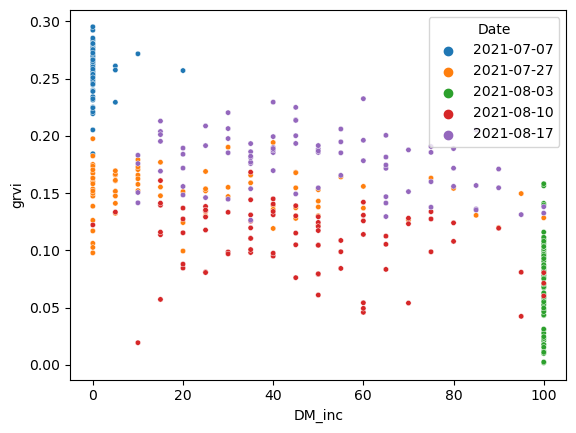

In [60]:
sns.scatterplot(data=dm_dfs[1], x='DM_inc', y='grvi', hue='Date', s=15)

In [61]:
dm_dfs[1][dm_dfs[1]['Date']=='2021-08-03'].describe()

,acquired,plot,blue,green,red,nir,row,panel,Treatment,PM_severity,...,PM_inc,DM_inc,ndvi,evi,savi,arvi,grvi,bgvi,gcc,gri
count,80.0,80.0000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,...,80.0,80.0,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,20210802.0,40.5000,0.005878,0.031382,0.027297,0.222137,3.000000,8.500000,10.450000,0.026250,...,100.0,100.0,0.780768,0.362717,0.389448,0.639886,0.071378,-5.611000,0.487871,1.156704
std,0.0,23.2379,0.001640,0.003046,0.003542,0.017457,1.423136,4.638856,5.858889,0.110801,...,0.0,0.0,0.027119,0.027197,0.025209,0.037597,0.034631,1.245819,0.021303,0.080882
min,20210802.0,1.0000,0.002747,0.025367,0.019557,0.199703,1.000000,1.000000,1.000000,0.000000,...,100.0,100.0,0.709724,0.313639,0.345238,0.546220,0.001799,-9.402175,0.441466,1.003604
25%,20210802.0,20.7500,0.004782,0.029010,0.024481,0.207692,2.000000,4.750000,5.000000,0.000000,...,100.0,100.0,0.768863,0.343640,0.371649,0.621817,0.049310,-6.098653,0.475145,1.103735
50%,20210802.0,40.5000,0.005853,0.030624,0.027327,0.219422,3.000000,8.500000,10.500000,0.000000,...,100.0,100.0,0.786380,0.360473,0.387800,0.649590,0.075634,-5.454793,0.489421,1.163645
75%,20210802.0,60.2500,0.006664,0.033531,0.029359,0.232244,4.000000,12.250000,15.250000,0.000000,...,100.0,100.0,0.798439,0.380858,0.405867,0.663233,0.094172,-4.870491,0.500341,1.207926
max,20210802.0,80.0000,0.010165,0.038493,0.035903,0.259890,5.000000,16.000000,20.000000,0.700000,...,100.0,100.0,0.838005,0.416023,0.439261,0.720225,0.158164,-3.530181,0.542752,1.375759


In [62]:
no_aug03 = dm_dfs[1][dm_dfs[1].Date != '2021-08-03']

In [63]:
no_aug03.Date.unique()

array(['2021-07-07', '2021-07-27', '2021-08-10', '2021-08-17'],
      dtype=object)

In [64]:
dm_spear_noaug3 = spearman_df(vis, no_aug03, 'DM_inc')
print("Spearman's rank correlation, GDM Incidence 2021\n\nDM Trial", dm_spear_noaug3)

Spearman's rank correlation, GDM Incidence 2021

DM Trial      vi  spearmans_r       p_value
3  arvi    -0.643335  8.912174e-39
4  grvi    -0.576257  1.044968e-29
1   evi    -0.519515  1.619650e-23
5  bgvi    -0.450235  2.231471e-17
2  savi    -0.425432  1.692032e-15
0  ndvi    -0.296321  6.597422e-08
6   gcc     0.105498  5.941851e-02


Text(0.5, 1.0, 'ARVI vs. GDM Incidence 2021\nGDM Trial')

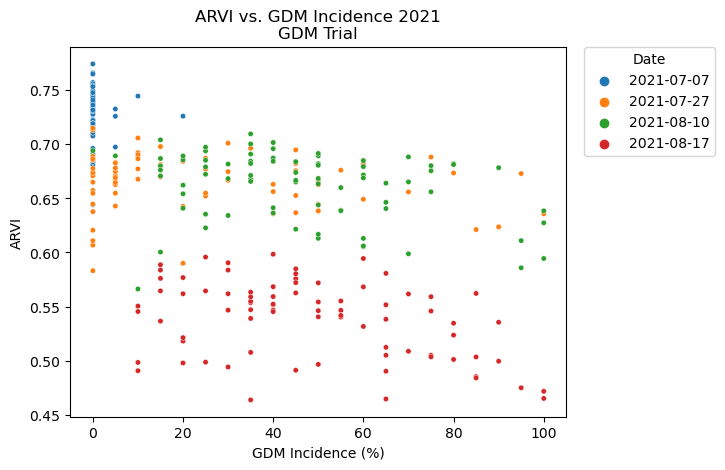

In [65]:
sns.scatterplot(data=no_aug03, x='DM_inc', y='arvi', hue='Date', s=15)
plt.legend(title='Date', bbox_to_anchor=(1.3, 1), loc='upper right', borderaxespad=0)
plt.xlabel("GDM Incidence (%)", fontsize=10)
plt.ylabel("ARVI", fontsize= 10)
plt.title("ARVI vs. GDM Incidence 2021\nGDM Trial")

In [69]:
for d in dfs:
    d['severity_class'] = 'low'
    d.loc[d['DM_severity'] > 10, 'severity_class'] = 'high'
    d['inc_class'] = 'low'
    d.loc[d['DM_inc'] > 25, 'inc_class'] = 'high'

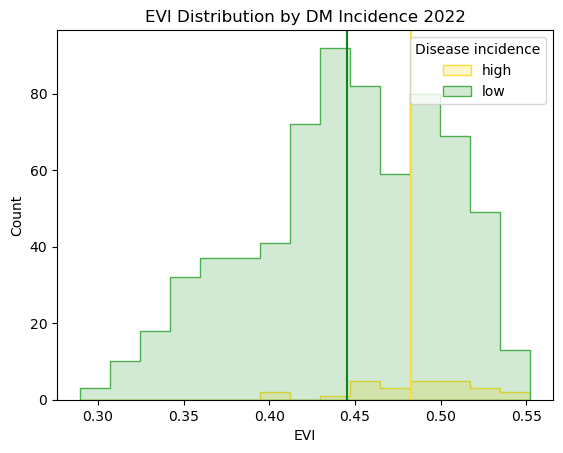

In [73]:
# Plot the 2022 EVI distribution


colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))
sns.histplot(data=dfs[2], x="evi", hue="inc_class", element='step')

plt.xlabel('EVI')
plt.ylabel('Count')
plt.legend(title='Disease incidence', loc='upper right', labels=['high', 'low'])

# Add lines for mean EVI

#high disease
plt.axvline(x=dfs[2][dfs[2]['inc_class']=='high'].evi.mean(),
            color="#FFDD33")
#plt.text(0.49, 20, "High disease \nEVI (mean):\n 0.48", horizontalalignment='left', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=dfs[2][dfs[2]['inc_class']=='low'].evi.mean(),
            color="#0F8518")

#plt.text(0.38, 25, "Low disease \nEVI (mean):\n 0.46", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.title('EVI Distribution by DM Incidence 2022')
#plt.savefig("evi_hist_2021.png")
plt.show()

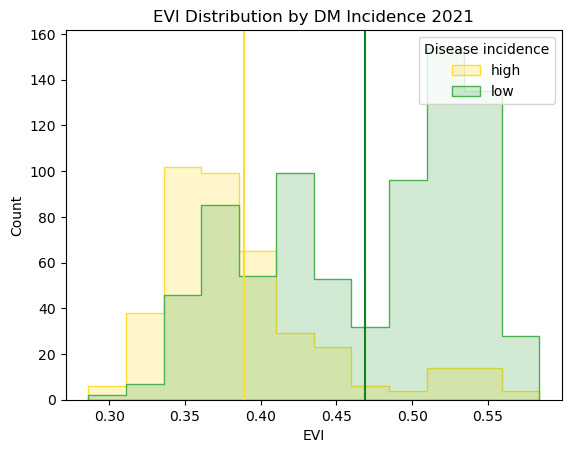

In [74]:
# Plot the 2022 EVI distribution


colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))
sns.histplot(data=dfs[1], x="evi", hue="inc_class", element='step')

plt.xlabel('EVI')
plt.ylabel('Count')
plt.legend(title='Disease incidence', loc='upper right', labels=['high', 'low'])

# Add lines for mean EVI

#high disease
plt.axvline(x=dfs[1][dfs[1]['inc_class']=='high'].evi.mean(),
            color="#FFDD33")
#plt.text(0.49, 20, "High disease \nEVI (mean):\n 0.48", horizontalalignment='left', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=dfs[1][dfs[1]['inc_class']=='low'].evi.mean(),
            color="#0F8518")

#plt.text(0.38, 25, "Low disease \nEVI (mean):\n 0.46", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.title('EVI Distribution by DM Incidence 2021')
#plt.savefig("evi_hist_2021.png")
plt.show()

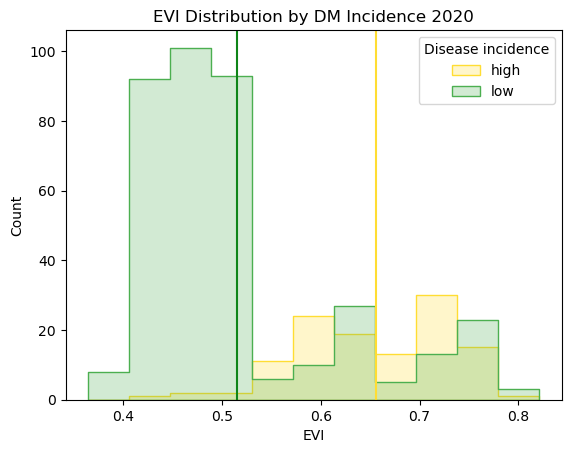

In [75]:
# Plot the 2020 EVI distribution


colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))
sns.histplot(data=dfs[0], x="evi", hue="inc_class", element='step')

plt.xlabel('EVI')
plt.ylabel('Count')
plt.legend(title='Disease incidence', loc='upper right', labels=['high', 'low'])

# Add lines for mean EVI

#high disease
plt.axvline(x=dfs[0][dfs[0]['inc_class']=='high'].evi.mean(),
            color="#FFDD33")
#plt.text(0.49, 20, "High disease \nEVI (mean):\n 0.48", horizontalalignment='left', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=dfs[0][dfs[0]['inc_class']=='low'].evi.mean(),
            color="#0F8518")

#plt.text(0.38, 25, "Low disease \nEVI (mean):\n 0.46", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.title('EVI Distribution by DM Incidence 2020')
#plt.savefig("evi_hist_2021.png")
plt.show()